#### Importing Libraries Used in Analysis

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report
import pickle
sns.set(rc={'figure.figsize':(24,10)})

#### Reading The Dataset

In [2]:
data=pd.read_csv('website_classification.csv')
data.head(10)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
5,5,https://book.priceline.com/?refid=8431&refclic...,hotel reservations bundle save book flight sal...,Travel
6,6,https://www.trip.com/index?locale=en_us&allian...,official travel deals promotion choose million...,Travel
7,7,https://www.orbitz.com/,bot create free account create free account si...,Travel
8,8,https://www.travelocity.com/,bot create free account create free account si...,Travel
9,9,https://www.hotwire.com/,cheap hotels cars flights minute travel deals ...,Travel


#### Droping the Un-Named Column

In [3]:
data=data.iloc[: , 1:]

In [4]:
data.head(10)

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
5,https://book.priceline.com/?refid=8431&refclic...,hotel reservations bundle save book flight sal...,Travel
6,https://www.trip.com/index?locale=en_us&allian...,official travel deals promotion choose million...,Travel
7,https://www.orbitz.com/,bot create free account create free account si...,Travel
8,https://www.travelocity.com/,bot create free account create free account si...,Travel
9,https://www.hotwire.com/,cheap hotels cars flights minute travel deals ...,Travel


#### Data Properties

In [5]:
print(data.shape)

(1408, 3)


In [6]:
print(data.dtypes)

website_url             object
cleaned_website_text    object
Category                object
dtype: object


#### Finding Unique Values in the Target

In [7]:
print(data['Category'].nunique())

16


In [8]:
print(data['Category'].unique())

['Travel' 'Social Networking and Messaging' 'News' 'Streaming Services'
 'Sports' 'Photography' 'Law and Government' 'Health and Fitness' 'Games'
 'E-Commerce' 'Forums' 'Food' 'Education' 'Computers and Technology'
 'Business/Corporate' 'Adult']


In [9]:
dic={'Travel':0, 'Social Networking and Messaging':0, 'News':0, 'Streaming Services':0,'Sports':0, 'Photography':0, 'Law and Government':0, 'Health and Fitness':0, 'Games':0,
 'E-Commerce':0, 'Forums':0, 'Food':0, 'Education':0, 'Computers and Technology':0,
 'Business/Corporate':0, 'Adult':0}
for i in data['Category']:
    dic[i]=dic[i]+1
print(dic)

{'Travel': 107, 'Social Networking and Messaging': 83, 'News': 96, 'Streaming Services': 105, 'Sports': 104, 'Photography': 93, 'Law and Government': 84, 'Health and Fitness': 96, 'Games': 98, 'E-Commerce': 102, 'Forums': 16, 'Food': 92, 'Education': 114, 'Computers and Technology': 93, 'Business/Corporate': 109, 'Adult': 16}


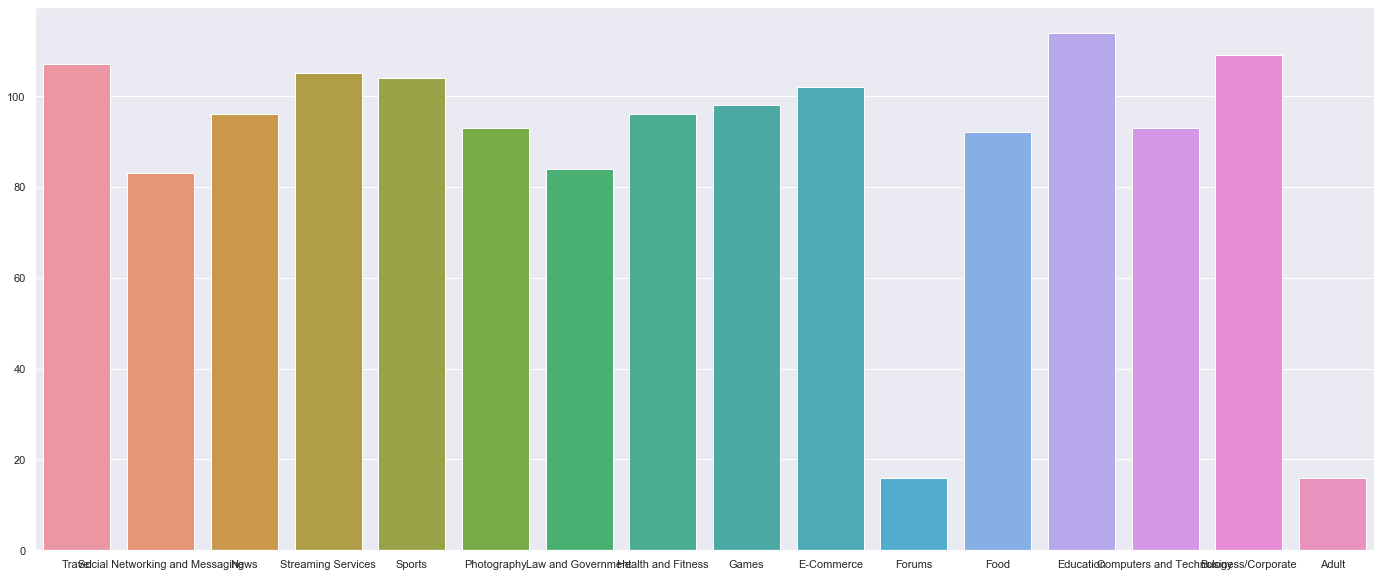

In [10]:
key=list(dic.keys())
values=list(dic.values())
sns.barplot(key,values)

([<matplotlib.patches.Wedge at 0x140eab067c8>,
 [Text(1.0687995480222428, 0.2601298255630247, 'Travel'),
  Text(0.867181062468973, 0.6767547597876084, 'Social Networking and Messaging'),
  Text(0.5357693520312355, 0.9607034929800299, 'News'),
  Text(0.06622785562003652, 1.098004495045431, 'Streaming Services'),
  Text(-0.4345189309282267, 1.0105410920219875, 'Sports'),
  Text(-0.823236624186235, 0.729576219869077, 'Photography'),
  Text(-1.040566625943455, 0.35668066526327735, 'Law and Government'),
  Text(-1.0971973259042975, -0.07847310385386072, 'Health and Fitness'),
  Text(-0.9630847698663981, -0.531476928992583, 'Games'),
  Text(-0.6393947352045037, -0.8950834444859108, 'E-Commerce'),
  Text(-0.38441059646246356, -1.030644697908728, 'Forums'),
  Text(-0.12734105388401498, -1.0926043455870513, 'Food'),
  Text(0.3705788144891694, -1.0356984803753464, 'Education'),
  Text(0.7932790634425405, -0.7620422084791142, 'Computers and Technology'),
  Text(1.0460103580187186, -0.340385562146

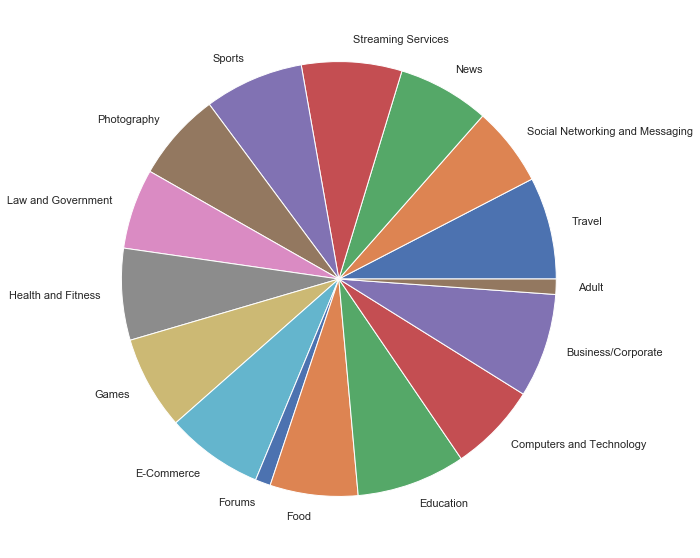

In [11]:
plt.pie(values,labels=key)

#### Data Pre-Processing and Exploratory Data Analysis

In [12]:
data.drop('website_url',axis=1,inplace=True)

In [13]:
data.head()

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel


#### Converting the text into lowercase

In [14]:
def convert_lowercase(sent):
    sent=sent.lower()
    return sent

In [15]:
data['cleaned_website_text']=data['cleaned_website_text'].apply(convert_lowercase)

#### Removing punctuations in text column

In [16]:
def remove_punctuation(sen):
    for punctuations in string.punctuation:
        sen=sen.replace(punctuations,'')
    return sen

In [17]:
data['cleaned_website_text']=data['cleaned_website_text'].apply(remove_punctuation)

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omprakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data['cleaned_website_text'] = data['cleaned_website_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [23]:
lemma = WordNetLemmatizer()
def lemmatization(text):

    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens)

In [24]:
data['cleaned_website_text']=data['cleaned_website_text'].apply(lemmatization)

In [25]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'violet')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

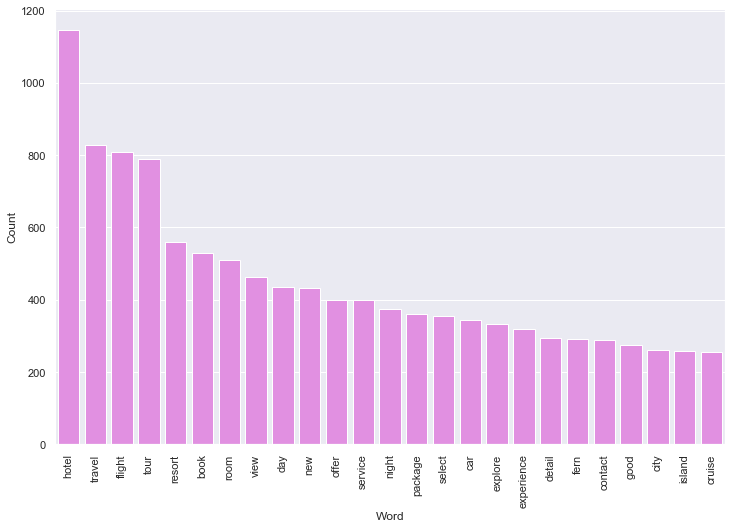

In [26]:
counter(data[data["Category"] == "Travel"], "cleaned_website_text", 25)

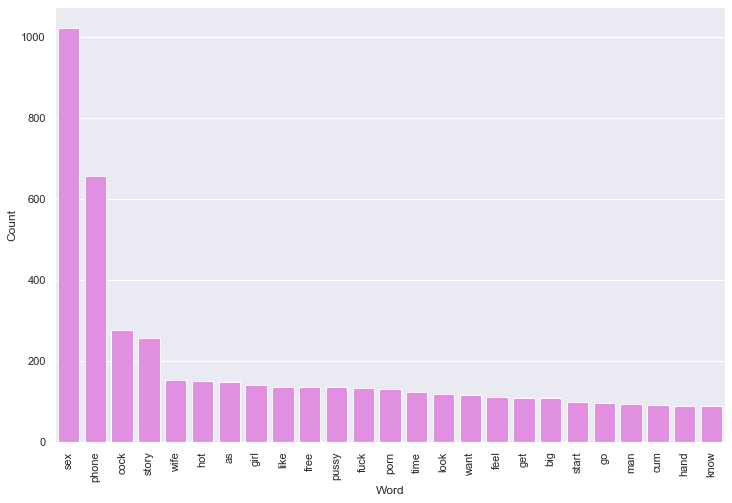

In [27]:
counter(data[data["Category"] == "Adult"], "cleaned_website_text", 25)

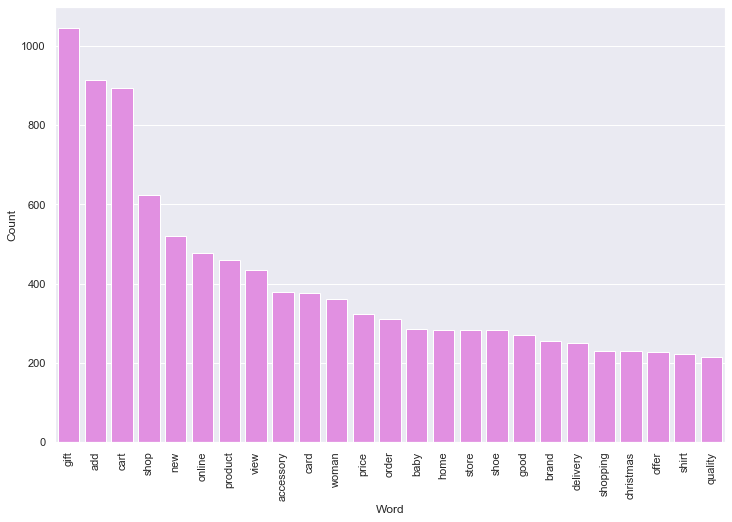

In [28]:
counter(data[data["Category"] == "E-Commerce"], "cleaned_website_text", 25)

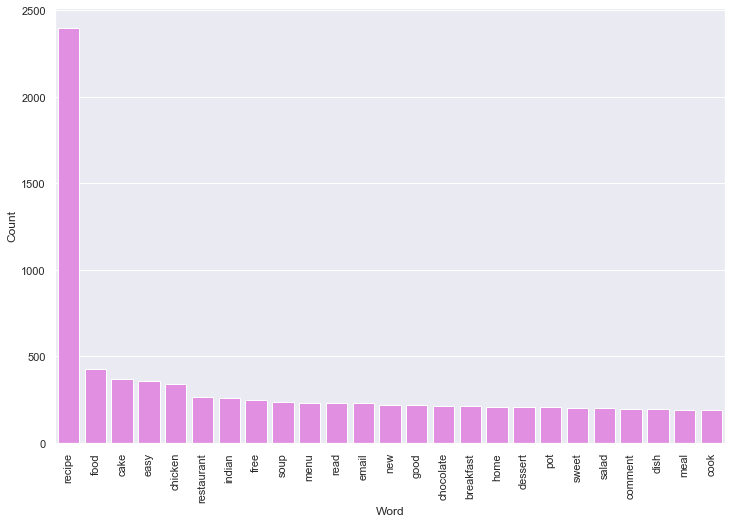

In [29]:
counter(data[data["Category"] == "Food"], "cleaned_website_text", 25)

#### Label Encoding

In [30]:
label={'Travel': 1, 'Social Networking and Messaging': 2, 'News': 3, 'Streaming Services': 4, 'Sports': 5, 'Photography': 6, 'Law and Government': 7, 'Health and Fitness': 8, 'Games': 9, 'E-Commerce': 10, 'Forums': 11, 'Food': 12, 'Education': 13, 'Computers and Technology': 14, 'Business/Corporate': 15, 'Adult': 16}

In [31]:
def labelencode(x):
    return label[x]

In [32]:
data['Category']=data['Category'].apply(labelencode)

In [33]:
data.head(10)

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,1
1,expedia hotel book site like use vacation work...,1
2,tripadvisor hotel book site like previously de...,1
3,cheap flight search compare flight momondo fin...,1
4,bot create free account create free account si...,1
5,hotel reservation bundle save book flight sale...,1
6,official travel deal promotion choose million ...,1
7,bot create free account create free account si...,1
8,bot create free account create free account si...,1
9,cheap hotel car flight minute travel deal hotw...,1


#### Train Test Split

In [34]:
x=data['cleaned_website_text']
y=data['Category']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

#### Tfidf-Vector

In [38]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [39]:
tfidf_train.shape,tfidf_test.shape

((985, 44882), (423, 44882))

#### Classification Models

#### Logistic Regression

In [44]:
lr=LogisticRegression(random_state=0)
lr.fit(tfidf_train,y_train)
yprediction1=lr.predict(tfidf_test)

In [47]:
print("Accuaracy Percentage ",accuracy_score(yprediction1,y_test))

Accuaracy Percentage  0.9125295508274232


In [48]:
print(classification_report(yprediction1, y_test))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        30
           2       0.81      1.00      0.89        21
           3       0.90      0.93      0.92        29
           4       0.97      0.95      0.96        40
           5       0.96      0.96      0.96        28
           6       0.91      0.87      0.89        23
           7       0.90      0.96      0.93        28
           8       0.97      0.97      0.97        34
           9       0.97      1.00      0.98        30
          10       0.89      0.86      0.88        29
          11       0.00      0.00      0.00         0
          12       0.91      1.00      0.95        20
          13       0.97      0.93      0.95        41
          14       0.92      0.74      0.82        31
          15       0.90      0.71      0.79        38
          16       0.33      1.00      0.50         1

    accuracy                           0.91       423
   macro avg       0.83   

C:\Users\Omprakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Naive Bayes Classifier

In [49]:
model_naive = naive_bayes.MultinomialNB()
model_naive.fit(tfidf_train, y_train)
yprediction2=model_naive.predict(tfidf_test)

In [50]:
print("Accuaracy Percentage ",round(accuracy_score(yprediction2,y_test),2))

Accuaracy Percentage  0.88


In [51]:
print(classification_report(yprediction2, y_test))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.81      1.00      0.89        21
           3       0.93      0.61      0.74        46
           4       0.95      0.97      0.96        38
           5       0.96      0.93      0.95        29
           6       0.91      0.80      0.85        25
           7       0.73      1.00      0.85        22
           8       0.91      1.00      0.95        31
           9       0.87      1.00      0.93        27
          10       0.89      0.89      0.89        28
          11       0.00      0.00      0.00         0
          12       0.95      1.00      0.98        21
          13       0.97      0.88      0.93        43
          14       0.76      0.86      0.81        22
          15       0.97      0.74      0.84        39
          16       0.00      0.00      0.00         0

    accuracy                           0.88       423
   macro avg       0.79   

C:\Users\Omprakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [52]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(tfidf_train,y_train)
yprediction3=dt.predict(tfidf_test)

In [53]:
print("Accuaracy Percentage ",round(accuracy_score(yprediction3,y_test),2))

Accuaracy Percentage  0.68


In [54]:
print(classification_report(yprediction3, y_test))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        29
           2       0.81      0.64      0.71        33
           3       0.67      0.71      0.69        28
           4       0.79      0.76      0.77        41
           5       0.75      0.84      0.79        25
           6       0.73      0.89      0.80        18
           7       0.60      0.67      0.63        27
           8       0.71      0.83      0.76        29
           9       0.68      0.78      0.72        27
          10       0.79      0.79      0.79        28
          11       0.00      0.00      0.00         2
          12       0.77      0.81      0.79        21
          13       0.62      0.55      0.58        44
          14       0.64      0.50      0.56        32
          15       0.47      0.45      0.46        31
          16       0.33      0.12      0.18         8

    accuracy                           0.68       423
   macro avg       0.63   

#### Random Forest Classifier

In [55]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(tfidf_train,y_train)
yprediction4=rf.predict(tfidf_test)

In [56]:
print("Accuaracy Percentage ",round(accuracy_score(yprediction4,y_test),2))

Accuaracy Percentage  0.84


In [57]:
print(classification_report(yprediction4, y_test))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        29
           2       0.81      0.78      0.79        27
           3       0.87      0.93      0.90        28
           4       0.97      0.73      0.84        52
           5       0.93      0.90      0.91        29
           6       0.82      0.82      0.82        22
           7       0.90      0.93      0.92        29
           8       0.85      0.85      0.85        34
           9       0.81      1.00      0.89        25
          10       0.96      0.79      0.87        34
          11       0.00      0.00      0.00         0
          12       0.82      0.95      0.88        19
          13       0.77      0.79      0.78        38
          14       0.84      0.81      0.82        26
          15       0.80      0.80      0.80        30
          16       0.33      1.00      0.50         1

    accuracy                           0.84       423
   macro avg       0.77   

C:\Users\Omprakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVM Classifier

In [58]:
svm=LinearSVC()
svm.fit(tfidf_train,y_train)
yprediction5=svm.predict(tfidf_test)

In [80]:
print("Accuaracy Percentage ",round(accuracy_score(yprediction5,y_test),3))

Accuaracy Percentage  0.939


In [75]:
print(classification_report(yprediction5, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.88      0.92      0.90        25
           3       0.90      0.93      0.92        29
           4       1.00      0.95      0.97        41
           5       0.93      0.93      0.93        28
           6       0.91      0.83      0.87        24
           7       1.00      0.94      0.97        32
           8       0.97      0.97      0.97        34
           9       0.97      1.00      0.98        30
          10       0.89      0.96      0.93        26
          11       0.14      1.00      0.25         1
          12       1.00      0.96      0.98        23
          13       0.97      1.00      0.99        38
          14       0.96      0.80      0.87        30
          15       0.90      0.90      0.90        30
          16       1.00      1.00      1.00         3

    accuracy                           0.94       423
   macro avg       0.90   

#### Passive Agressive Classifier

In [76]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
yprediction6=pac.predict(tfidf_test)

In [79]:
print("Accuaracy Percentage ",round(accuracy_score(yprediction6,y_test),3))

Accuaracy Percentage  0.936


In [65]:
print(classification_report(yprediction6, y_test))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       0.92      0.92      0.92        26
           3       0.90      0.93      0.92        29
           4       0.97      0.95      0.96        40
           5       0.93      0.96      0.95        27
           6       0.91      0.91      0.91        22
           7       1.00      0.94      0.97        32
           8       0.97      0.97      0.97        34
           9       0.97      1.00      0.98        30
          10       0.89      0.96      0.93        26
          11       0.14      0.50      0.22         2
          12       1.00      0.92      0.96        24
          13       0.97      1.00      0.99        38
          14       0.96      0.80      0.87        30
          15       0.90      0.84      0.87        32
          16       1.00      1.00      1.00         3

    accuracy                           0.94       423
   macro avg       0.90   

#### Ada Boost Classifier

In [69]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(tfidf_train,y_train)
yprediction8=gbc.predict(tfidf_test)

In [71]:
print("Accuaracy Percentage ",round(accuracy_score(yprediction8,y_test),2))

Accuaracy Percentage  0.69


#### Pickling Tfidf and SVM Model

In [82]:
Pkl_filename = "tfidf.pkl"  
pickle.dump(tfidf_vectorizer, open(Pkl_filename, 'wb'))

In [83]:
Pkl_Filename = "webc.pkl"  
pickle.dump(svm, open(Pkl_Filename, 'wb'))